In [201]:
import pandas as pd
import csv
from emotion_predictor import EmotionPredictor
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
df = pd.read_csv("daily_MSFT.csv") 

109.57


In [203]:
inp = pd.read_csv("test.csv")
close = []    
all_dates = []
for i,row in inp.iterrows():
    c = 0
    dates = row[0].split(" ")[0].split("-")
    if int(dates[2]) < 10:
        dates[2]  = dates[2].strip("0")
    date = dates[1]+"/"+dates[2]+"/"+dates[0][2:]
    all_dates.append(date)
    f = df.loc[df['timestamp'] == date]
    close.append(f['close'].values[0])
inp['close'] = close
inp['date'] = all_dates
for i,row in inp.iterrows():
    print(row)
    c = c+1
    if c == 2:
        break

created_at                                  2018-11-14 05:08:33
text          RT @Atmosera: Ten years since @Microsoft annou...
close                                                    104.97
date                                                   11/14/18
Name: 0, dtype: object
created_at                           2018-11-14 05:07:30
text          @RBMercys @Microsoft @Xbox this your mans?
close                                             104.97
date                                            11/14/18
Name: 1, dtype: object


In [204]:
inp = pd.read_csv("test_stock.csv", index_col=0)
df = pd.read_csv("output_v1.csv", index_col=0)
df = df[1:]
df = pd.concat([inp.reset_index(drop=True),df.reset_index(drop=True)], axis=1)
# df.to_csv("output_stock.csv")

## To get one row per day

date
11/14/18    104.97
11/13/18    106.94
11/12/18    106.87
11/11/18    108.22
11/10/18    108.22
11/9/18     109.57
11/8/18     111.75
11/7/18     111.96
11/6/18     107.72
11/5/18     107.51
11/4/18     107.51
Name: close, dtype: float64
date
11/14/18    104.99
11/13/18    108.10
11/12/18    107.55
11/11/18    109.42
11/10/18    110.14
11/9/18     110.14
11/8/18     110.85
11/7/18     111.80
11/6/18     109.44
11/5/18     107.38
11/4/18     106.37
Name: open, dtype: float64


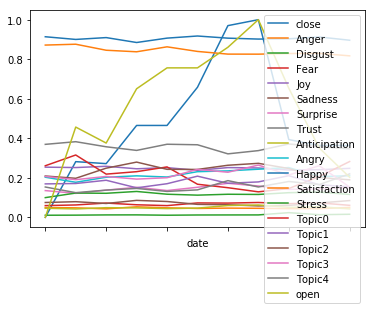

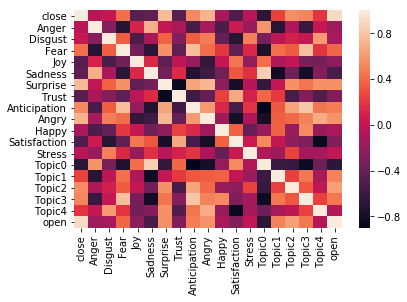

In [205]:
df = df.drop('text', axis=1)
df = df.drop('Tweet', axis=1)
df = df.drop('created_at', axis=1)
df = df.groupby(['date'], sort=False).mean()
open_vals = [104.99,108.1,107.55,109.42,110.14,110.14,110.85,111.8,109.44,107.38,106.37]
df['open'] = open_vals
# df.to_csv("msft_7rows.csv")



### For visualisation

In [ ]:
inpu = df['close']
print(inpu)
old_min = min(inpu)
old_range = max(inpu) - old_min
new_min = 0.00001
new_range = 0.999999 - new_min
output = [float((n - old_min) / old_range * new_range + new_min) for n in inpu]
df['close'] = output


inpu = df['open']
print(inpu)
old_min = min(inpu)
old_range = max(inpu) - old_min
new_min = 0.00001
new_range = 0.999999 - new_min
output = [float((n - old_min) / old_range * new_range + new_min) for n in inpu]
df['open'] = output


# df['close'].plot()
# df[['Topic0','Topic1','Topic2','Topic3','Topic4']].plot()
# plt.show()



# df.to_csv("msft_7rows.csv")
df.plot()
plt.show()
# df = df.drop('close', axis=1)
# df = df.drop('Topic0', axis=1)
# df = df.drop('Topic1', axis=1)
# df = df.drop('Topic2', axis=1)
# df = df.drop('Topic3', axis=1)
# df = df.drop('Topic4', axis=1)
# df.plot()
# # plt.gcf().set_size_inches(25, 35)
# plt.show()
cor = df.corr(method='spearman') #Calculate the correlation of the above variables
sns.heatmap(cor, square = False) #Plot the correlation as heat map